In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('student intervention.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [5]:
df.skew()

age           0.466270
Medu         -0.318381
Fedu         -0.031672
traveltime    1.607029
studytime     0.632142
failures      2.387026
famrel       -0.951882
freetime     -0.163351
goout         0.116502
Dalc          2.190762
Walc          0.611960
health       -0.494604
absences      3.671579
dtype: float64

In [6]:
df.shape

(395, 31)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
onn=LabelEncoder()

In [9]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [10]:
col=['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic','passed']

In [11]:
for m in col:
    df[m]=onn.fit_transform(df[m].values.reshape(-1,1))

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,1


In [13]:
df.dtypes

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
traveltime    int64
studytime     int64
failures      int64
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
passed        int32
dtype: object

In [14]:
plt.rcParams ['figure.figsize']=(10,10)

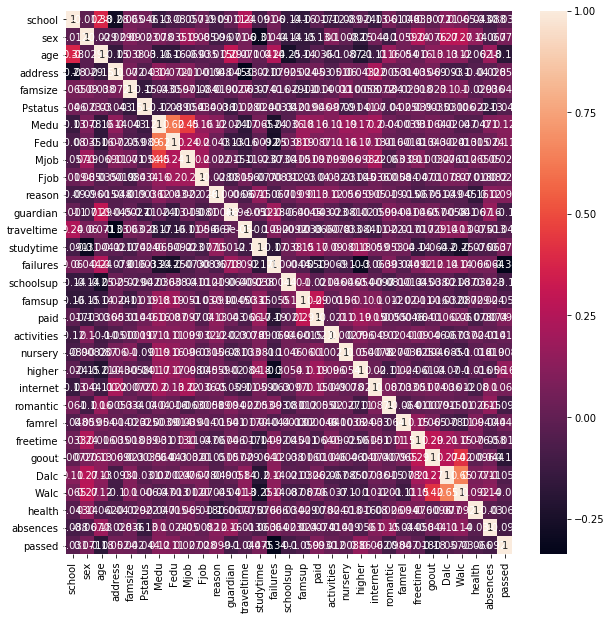

In [15]:
sns.heatmap(df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A08E06748>,
      dtype=object)

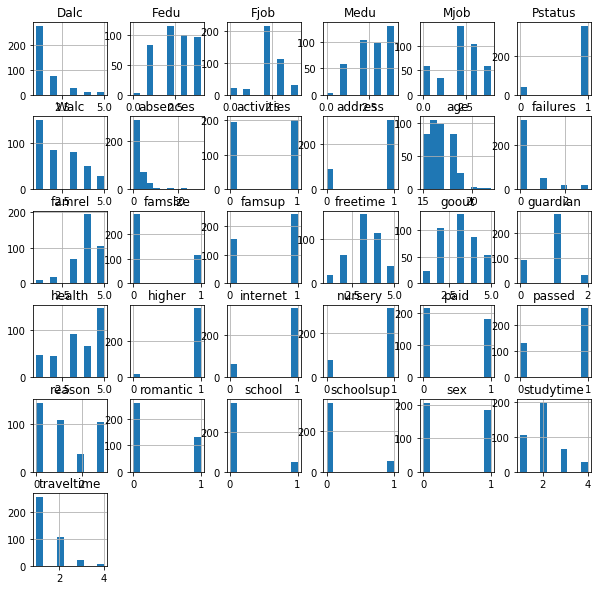

In [16]:
df.hist()

In [17]:
lr=LogisticRegression()

In [18]:
x=df.iloc[:,0:-1]

In [19]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [71]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [72]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
lr.score(xtrain,ytrain)

0.6666666666666666

In [74]:
accuracy_score(lr.predict(xtest),ytest)

0.6538461538461539

In [75]:
models=[lr,DecisionTreeClassifier(),RandomForestClassifier(n_estimators=150),SVC(),KNeighborsClassifier(),GaussianNB()]

In [76]:
for m in models:
    m.fit(xtrain,ytrain)
    score=m.score(xtrain,ytrain)
    accuracy=accuracy_score(m.predict(xtest),ytest)
    print('score of',m, '=', score)
    print('accuracy of', m, '=', accuracy)
    print(confusion_matrix(m.predict(xtest),ytest))
    print(classification_report(m.predict(xtest),ytest))
    print(cross_val_score(m,x,y,cv=15,scoring='accuracy').mean())

score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) = 0.6666666666666666
accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) = 0.6538461538461539
[[40 14]
 [31 45]]
              precision    recall  f1-score   support

           0       0.56      0.74      0.64        54
           1       0.76      0.59      0.67        76

    accuracy                           0.65       130
   macro avg       0.66      0.67      0.65       

In [77]:
gb=GaussianNB()

In [78]:
rfr=RandomForestClassifier(n_estimators=150)

In [79]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
imp=rfr.feature_importances_

In [83]:
cols=x.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [31]:
table=pd.DataFrame({'columns':cols,'importance':imp})

In [32]:
table.sort_values('importance')

,columns,importance
0,school,0.009774
5,Pstatus,0.010817
21,internet,0.013485
20,higher,0.015333
15,schoolsup,0.016626
3,address,0.017023
22,romantic,0.017392
16,famsup,0.017414
19,nursery,0.017708
4,famsize,0.017924


In [33]:
from sklearn.decomposition import PCA

In [34]:
pca=PCA(n_components=20)

In [35]:
x=pca.fit_transform(x)

In [36]:
x.shape

(395, 20)

In [84]:
svm=SVC()

In [85]:
svm.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [86]:
ada=AdaBoostClassifier(base_estimator=rfr,n_estimators=150)

In [87]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=150,
                        

In [88]:
ada.score(xtrain,ytrain)

1.0

In [89]:
accuracy_score(ada.predict(xtest),ytest)

0.7461538461538462

In [90]:
cv=cross_val_score(ada,x,y,cv=15,scoring='accuracy')

In [91]:
cv.mean()

0.8174291938997822

In [92]:
cv.std()

0.07487266559419348

In [46]:
zero=df['passed']==0

In [47]:
one=df['passed']==1

In [48]:
df[one].shape

(265, 31)

In [49]:
df[zero].shape

(130, 31)

In [50]:
from imblearn.combine import SMOTETomek

In [63]:
smk=SMOTETomek()

In [64]:
y=y.ravel()

In [65]:
y=y.reshape(-1,1)

In [66]:
y.shape

(395, 1)

In [67]:
x,y=smk.fit_sample(x,y)

In [68]:
x.shape

(520, 20)

In [94]:
import pickle

In [95]:
student_model=pickle.dumps(ada)